<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 2

</h4>

# Personal Data

In [ ]:
# Set your student number
student_number = 400101689
Name = 'Zahra'
Last_Name = 'Ghayour Hallaj'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

## Question 1) Convolutional Neural Networks ``(50 pt.)``

In this question, you'll be coding up a convolutional neural network from scratch to classify images using PyTorch.  

### Instructions
- Install PyTorch following the instructions [here](https://pytorch.org/).
- Install the [`torchinfo` package](https://github.com/TylerYep/torchinfo) to visualize the network architecture and the number of parameters. The maximum number of parameters you are allowed to use for your network is **100,000**.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

### Data Preparation
In this assignment, we will use the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

#### Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.  

#### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Fashion-MNIST is included in the `torchvision` library.

In [ ]:
# Import required packages
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Transform to normalize the data and convert to a tensor
transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Download the data
dataset = FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)

### Data Exploration
Let's take a look at the classes in our dataset.

In [ ]:
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now, visualize an instance from each class.

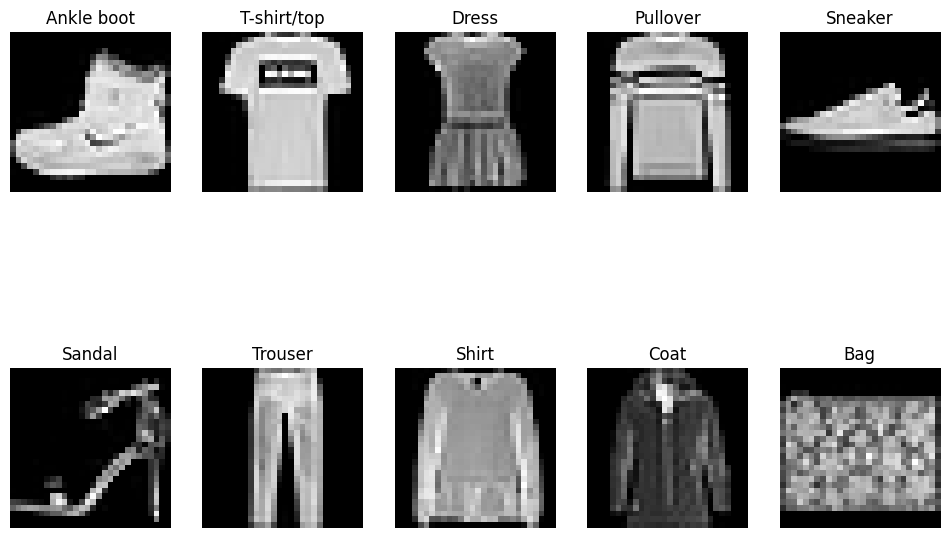

In [ ]:
######################

# Define dictionary to map class labels to descriptions
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
# Dictionary to store one image per class
class_images = {}

# Iterate through the dataset to find one example image for each class
for image, label in dataset:
    class_label = class_labels[label]
    if class_label not in class_images:
        class_images[class_label] = image
        if len(class_images) == 10:  # Found one image per class
            break

# Visualize one image from each class
plt.figure(figsize=(12, 8))
for i, (class_label, image) in enumerate(class_images.items()):
    plt.subplot(2, 5, i + 1)
    plt.title(class_label)
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

######################

### Creating Training and Validation Datasets

The `split_indices` function takes in the size of the entire dataset, `n`, the fraction of data to be used as validation set, `val_frac`, and the random seed and returns the indices of the data points to be added to the validation dataset.

In [ ]:
def split_indices(n, val_frac, seed):
    # Determine the size of the validation set
    n_val = int(val_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [ ]:
# Set the fraction for the validation set
val_frac = 0.2
# Set the random seed
rand_seed = 42

train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)
print("number of samples in training set: {}".format(len(train_indices)))
print("number of samples in validation set: {}".format(len(val_indices)))

number of samples in training set: 48000
number of samples in validation set: 12000


Next, we make use of the built-in dataloaders in PyTorch to create iterables of our our training and validation sets. This helps in avoiding fitting the whole dataset into memory and only loads a batch of the data that we can decide.

In [ ]:
# Import required packages
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size = 64 ## Set the batch size

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                   batch_size,
                   sampler=val_sampler)

Plot images in a sample batch of data.

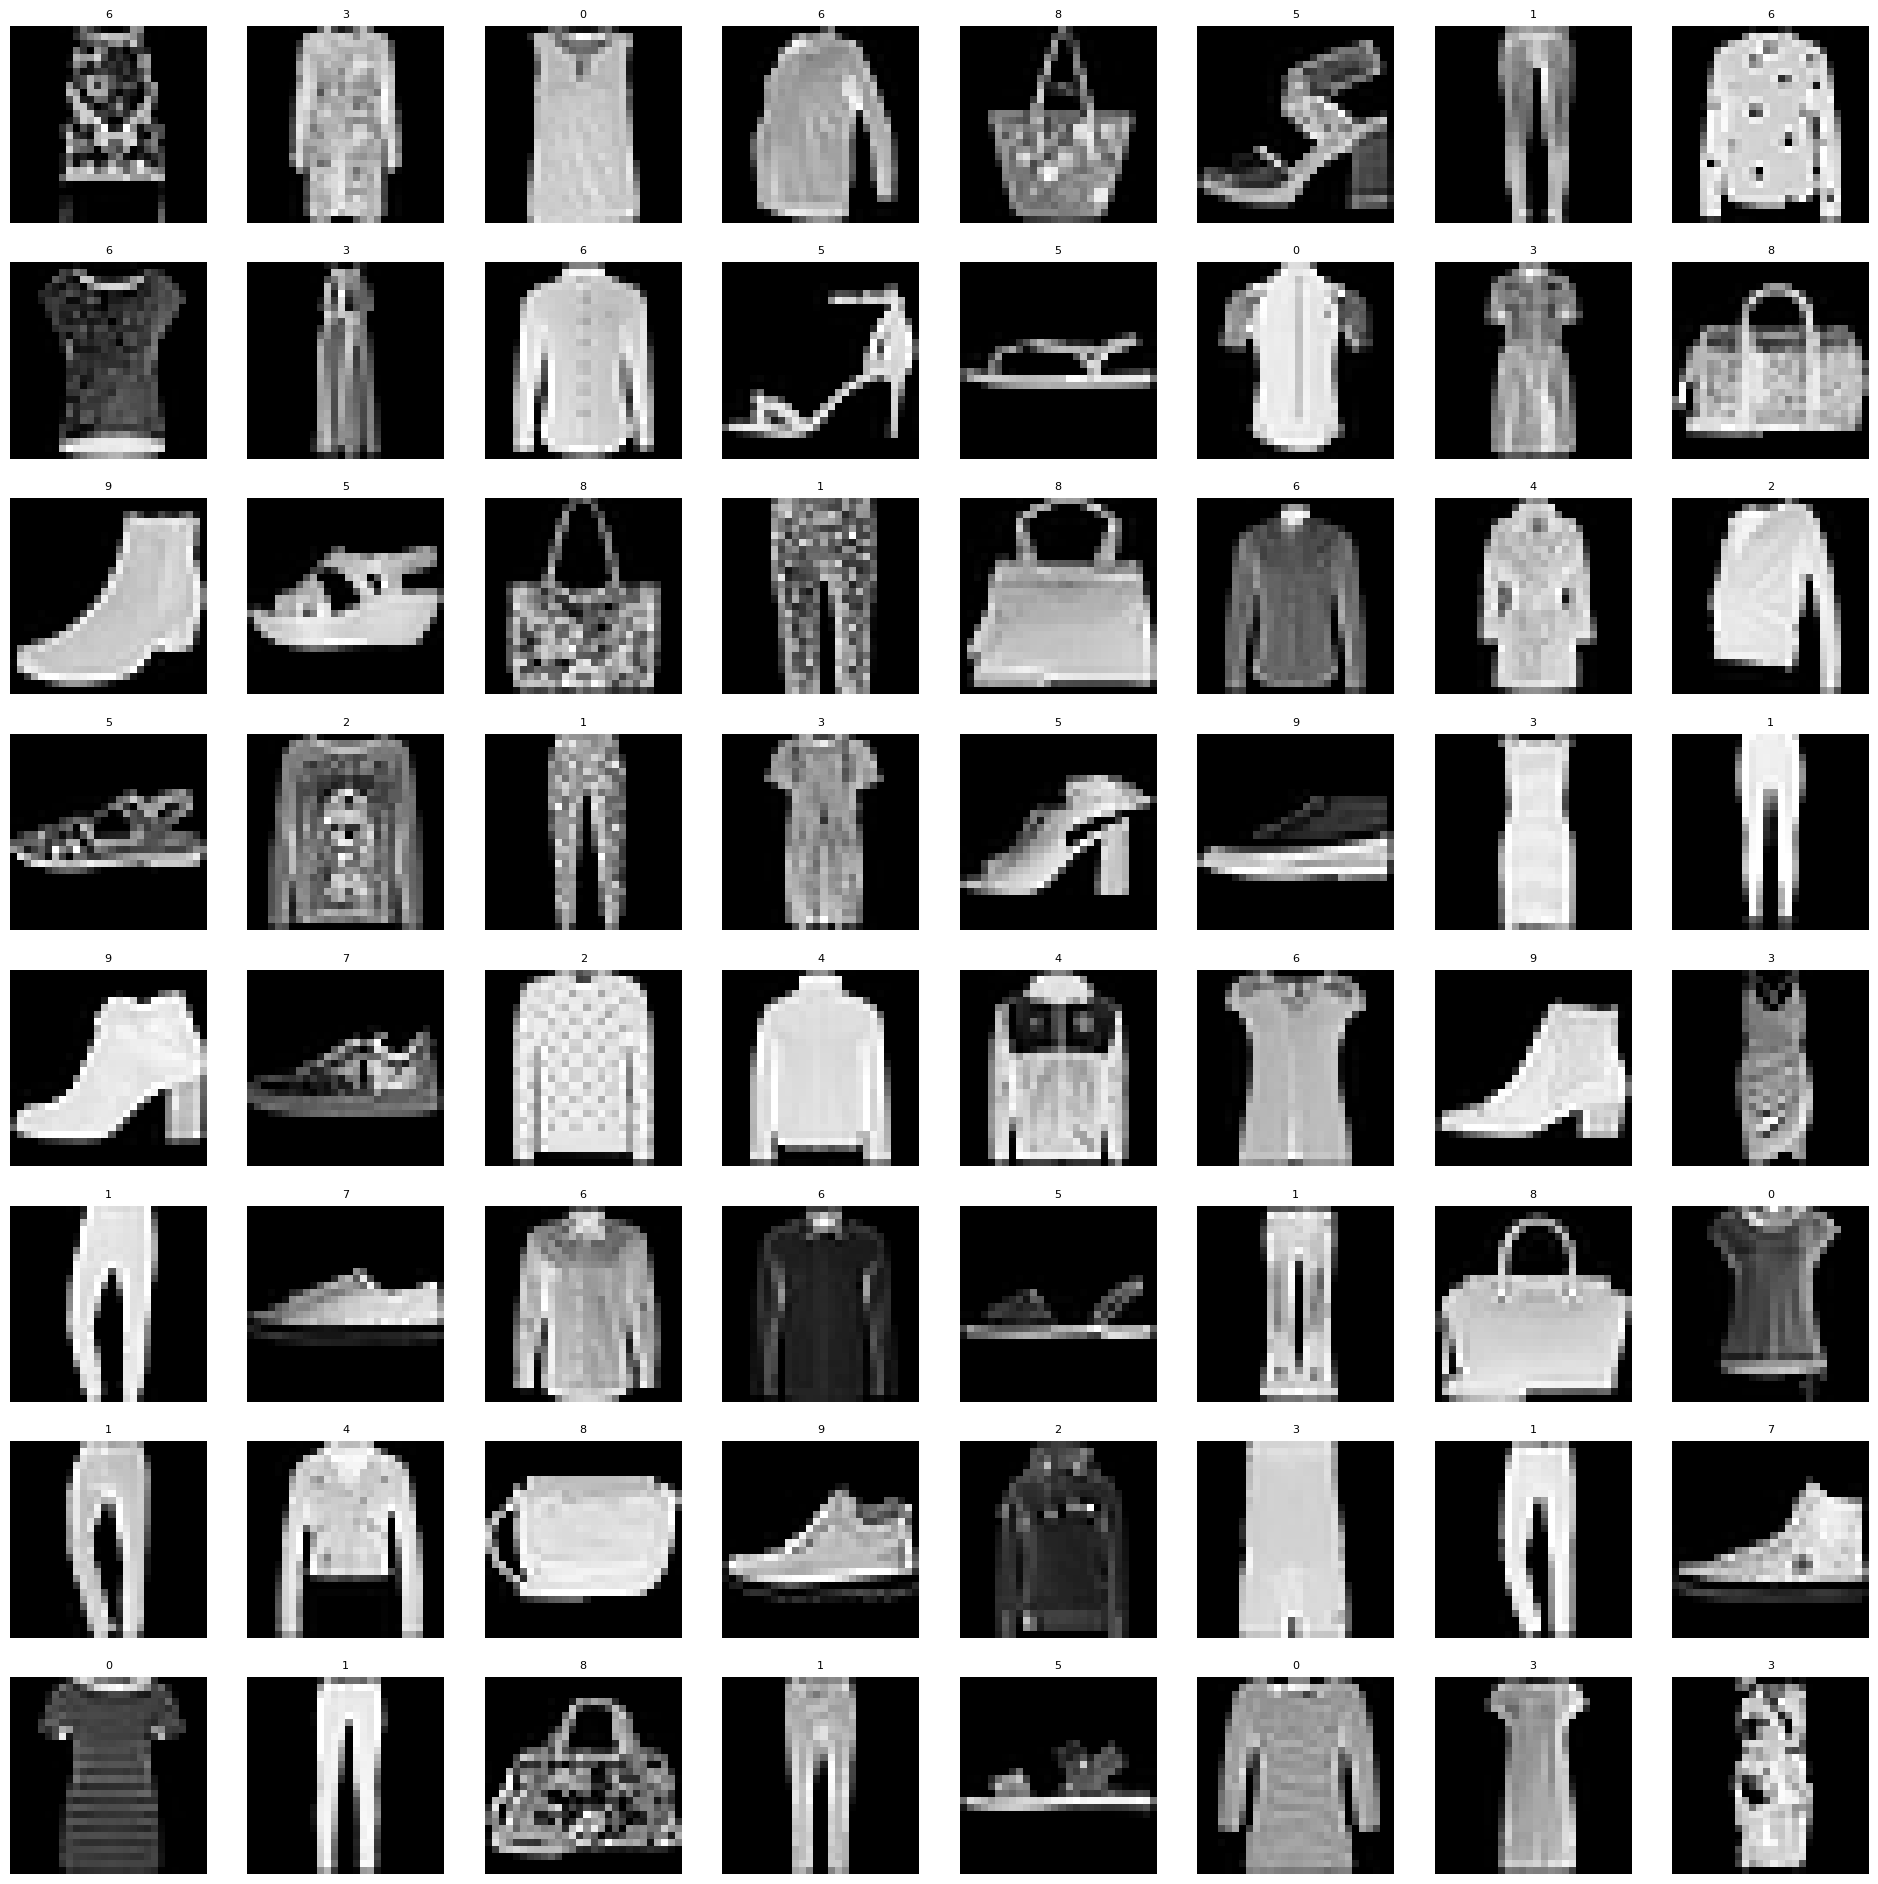

In [ ]:
# Get a batch of data
for images, labels in train_dl:
    batch_size = len(images)
    # Calculate number of rows and columns for subplots
    rows = math.ceil(math.sqrt(batch_size))
    cols = math.ceil(batch_size / rows)

    # Plot the images in the batch
    plt.figure(figsize=(cols * 3, rows * 3))
    for i in range(batch_size):  # Plotting all images from the batch
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Plotting as grayscale
        plt.title(labels[i].item(), fontsize=8)
        plt.axis('off')
    plt.show()
    break  # Break after plotting one batch


### Building the Model
Create your model by defining the network architecture in the `ImageClassifierNet` class.<br>
**NOTE:** The number of parameters in your network must be $\leq$ 100,000.

In [ ]:
pip install torchinfo

In [ ]:
# Import required packages
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim
import torch


In [ ]:
class ImageClassifierNet(nn.Module):
    def __init__(self):
        super(ImageClassifierNet, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        # Define the fully connected layers
        self.fc1 = nn.Linear(16 * 7 * 7, 32)  # Reduce the number of units in the fully connected layer
        self.fc2 = nn.Linear(32, 10)  # 10 output classes

    def forward(self, X):
        # Forward pass through convolutional layers
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, kernel_size=2, stride=2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, kernel_size=2, stride=2)
        # Flatten the output for fully connected layers
        X = X.view(-1, 16 * 7 * 7)
        # Forward pass through fully connected layers
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return X

In [ ]:
model = ImageClassifierNet()

The following code block prints your network architecture. It also shows the total number of parameters in your network (see `Total params`).  

**NOTE: The total number of parameters in your model should be <= 100,000.**

In [ ]:
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [64, 10]                  --
├─Conv2d: 1-1                            [64, 8, 28, 28]           80
├─Conv2d: 1-2                            [64, 16, 14, 14]          1,168
├─Linear: 1-3                            [64, 32]                  25,120
├─Linear: 1-4                            [64, 10]                  330
Total params: 26,698
Trainable params: 26,698
Non-trainable params: 0
Total mult-adds (M): 20.29
Input size (MB): 0.20
Forward/backward pass size (MB): 4.84
Params size (MB): 0.11
Estimated Total Size (MB): 5.15

### Train the model
Complete the `train_model` function to train your model on a dataset. Tune your network architecture and hyperparameters on the validation set.

In [1]:
def train_model(n_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr):
    """
    Trains the model on a dataset.

    Args:
        n_epochs: number of epochs
        model: ImageClassifierNet object
        train_dl: training dataloader
        val_dl: validation dataloader
        loss_fn: the loss function
        opt_fn: the optimizer
        lr: learning rate

    Returns:
        The trained model.
        A tuple of (model, train_losses, val_losses, train_accuracies, val_accuracies)
    """
    # Record these values at the end of each epoch
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    # Define the optimizer
    optimizer = opt_fn(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(n_epochs):
        # Training phase
        model.train()  # Set the model to training mode
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_dl:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass
            loss.backward()

            # Update parameters
            optimizer.step()

            # Record training loss
            train_loss += loss.item() * images.size(0)

            # Record training accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        # Calculate average training loss and accuracy
        train_loss /= len(train_dl.dataset)
        train_accuracy = correct_train / total_train

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        if val_dl:
            model.eval()
            val_loss = 0.0
            correct_val = 0
            total_val = 0

            with torch.no_grad():
                for images, labels in val_dl:
                    outputs = model(images)
                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).sum().item()

            val_loss /= len(val_dl)
            val_accuracy = correct_val / total_val
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
        else:
            print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')

    return model, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
num_epochs = 10 # Number of training epochs
loss_fn = nn.CrossEntropyLoss() # Define the loss function
opt_fn =  optim.Adam # Select an optimizer
lr = 0.001# Set the learning rate

In [ ]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.4850, Train Acc: 0.7804, Val Loss: 0.4190, Val Acc: 0.8491
Epoch 2/10, Train Loss: 0.3141, Train Acc: 0.8577, Val Loss: 0.3955, Val Acc: 0.8540
Epoch 3/10, Train Loss: 0.2777, Train Acc: 0.8752, Val Loss: 0.3447, Val Acc: 0.8765
Epoch 4/10, Train Loss: 0.2547, Train Acc: 0.8842, Val Loss: 0.3267, Val Acc: 0.8795
Epoch 5/10, Train Loss: 0.2382, Train Acc: 0.8921, Val Loss: 0.3045, Val Acc: 0.8872
Epoch 6/10, Train Loss: 0.2244, Train Acc: 0.8986, Val Loss: 0.2992, Val Acc: 0.8900
Epoch 7/10, Train Loss: 0.2118, Train Acc: 0.9037, Val Loss: 0.2784, Val Acc: 0.8962
Epoch 8/10, Train Loss: 0.2011, Train Acc: 0.9064, Val Loss: 0.2792, Val Acc: 0.8971
Epoch 9/10, Train Loss: 0.1939, Train Acc: 0.9114, Val Loss: 0.2693, Val Acc: 0.9031
Epoch 10/10, Train Loss: 0.1898, Train Acc: 0.9133, Val Loss: 0.2708, Val Acc: 0.9031


### Plot loss and accuracy

In [ ]:
def plot_accuracy(train_accuracies, val_accuracies):
    """Plot accuracies"""
    plt.plot(train_accuracies, "-x")
    plt.plot(val_accuracies, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title("Accuracy vs. No. of epochs")
    plt.show()

def plot_losses(train_losses, val_losses):
    """Plot losses"""
    plt.plot(train_losses, "-x")
    plt.plot(val_losses, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Loss vs. No. of Epochs")
    plt.show()

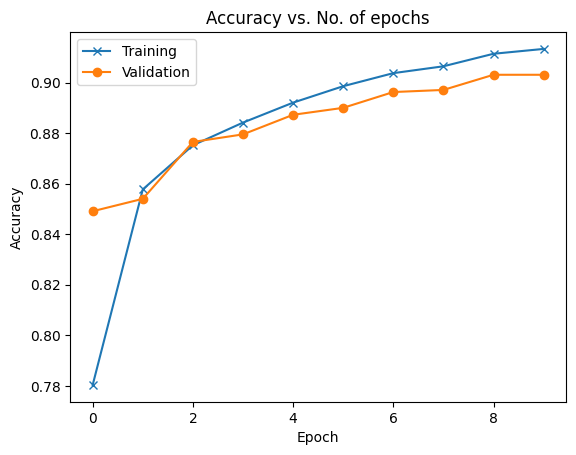

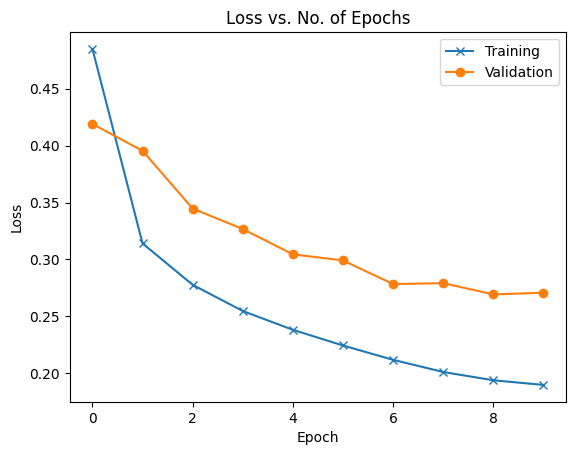

In [ ]:
plot_accuracy(train_accuracies, val_accuracies)
plot_losses(train_losses, val_losses)

### Train a model on the entire dataset

In [ ]:
indices, _ = split_indices(len(dataset), 0, rand_seed)

sampler = SubsetRandomSampler(indices)
dl = DataLoader(dataset, batch_size, sampler=sampler)

In [ ]:
num_epochs = 10 # Max number of training epochs
lr = 0.001 # Set the learning rate

In [ ]:
model, _, _, _, _ = train_model(num_epochs, model, dl, [], loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.2375, Train Acc: 0.9128
Epoch 2/10, Train Loss: 0.2268, Train Acc: 0.9169
Epoch 3/10, Train Loss: 0.2182, Train Acc: 0.9201
Epoch 4/10, Train Loss: 0.2133, Train Acc: 0.9213
Epoch 5/10, Train Loss: 0.2060, Train Acc: 0.9238
Epoch 6/10, Train Loss: 0.1996, Train Acc: 0.9267
Epoch 7/10, Train Loss: 0.1929, Train Acc: 0.9286
Epoch 8/10, Train Loss: 0.1889, Train Acc: 0.9301
Epoch 9/10, Train Loss: 0.1854, Train Acc: 0.9312
Epoch 10/10, Train Loss: 0.1804, Train Acc: 0.9328


### Check Predictions
Now, you should evaluate your model on dataset. Specifically, you should calculate the class probabilities for each image, and then visualize these probabilities along with the image itself. Please include a function `view_prediction` in your code that takes an image, its label, the calculated probabilities, and the list of class names as input, and plots the image along with the probabilities.

In [1]:
# Function to visualize predictions
def view_prediction(image, label, probs, class_names):
    """
    Plots the image along with the predicted probabilities.

    Args:
        image: The input image (tensor)
        label: The true label of the image
        probs: The probabilities for each class (tensor)
        class_names: List of class names
    """
    # Convert image tensor to numpy array and transpose it for plotting
    image = image.squeeze().numpy()

    # Get the top 3 predicted class probabilities and their corresponding labels
    top_probs, top_classes = torch.topk(probs, 3)
    top_probs = top_probs.detach().numpy()
    top_classes = top_classes.detach().numpy()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the image
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax1.set_title(f'True Label: {class_names[label]}')

    # Plot the probabilities as a bar chart
    ax2.barh(np.arange(3), top_probs, align='center')
    ax2.set_yticks(np.arange(3))
    ax2.set_yticklabels([class_names[i] for i in top_classes])
    ax2.invert_yaxis()
    ax2.set_title('Top 3 Predicted Class Probabilities')

    plt.show()

### Save the model

In [ ]:
torch.save(model, 'model')

### Calculate accuracy on the test set

In [ ]:
test_dataset = FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
test_dl = DataLoader(test_dataset, batch_size)

In [ ]:
def evaluate(model, test_dl):
    """
    Evaluates your model on the test data.

    Args:
        model: ImageClassifierNet object
        test_dl: test dataloader

    Returns:
        Test accuracy.
    """
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_dl:
            # Forward pass
            outputs = model(images)

            # Get predictions
            _, predicted = torch.max(outputs, 1)

            # Update total and correct counts
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate accuracy
    accuracy = correct / total
    return accuracy

In [ ]:
print("Test Accuracy = {:.4f}".format(evaluate(model, test_dl)))

Test Accuracy = 0.9074
